
### Build A Basic Chatbot With Langgraph(GRAPH API)

In [19]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool


In [20]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [18]:
graph_builder

In [23]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
import os
from langchain_ollama import OllamaLLM


llm=ChatGroq(model="llama3-8b-8192", api_key="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")

In [36]:
@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int - second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent


tools = [multiply, add, exponentiate]
# Construct the tool calling agent
agent = create_react_agent(llm, tools)

# Use the agent

# query = (
#     "What is the multiply of 2 and 3?"
# )
# input_message = {"role": "user", "content": query}

result = agent.invoke({"role": "user", "content": "What is the multiply of 2 and 3?"})
print(result)
# for step in agent.stream({"messages": [input_message]}, stream_mode="values"):
#     step["messages"][-1].pretty_print()

BadRequestError: Error code: 400 - {'error': {'message': "'messages' : minimum number of items is 1", 'type': 'invalid_request_error'}}

In [19]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
import os

llm=ChatGroq(model="llama3-8b-8192", api_key=os.getenv("GROQ_API_KEY"))

In [21]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x760d2d7cd6d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x760d2d7cc550>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [22]:
llm=init_chat_model('groq:llama3-8b-8192', api_key=os.getenv("GROQ_API_KEY"))
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x760d2e2f8fc0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x760d2e2f9940>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [41]:

## Node Functionality
def chatbot(state:State):
    # user_input = state["messages"]
    # response = llm.invoke([HumanMessage(content=user_input)])
    return {"messages":llm.invoke(state["messages"])}

In [42]:
graph_builder = StateGraph(State)
## adding node
graph_builder.add_node("llmchatbot", chatbot)
## adding edge
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

## compile the graph
graph = graph_builder.compile()



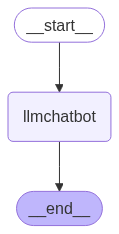

In [43]:
##visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [46]:
response=graph.invoke({"messages": "Hi"})

In [47]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [58]:
for event in graph.stream({"messages": "How are you?"}):
    # print(event)
    for value in event.values():
        print(value["messages"].content)
        

I'm just an AI, so I don't have emotions or feelings like humans do. I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?
